<a href="https://colab.research.google.com/github/i-am-U-hyUn/knu-dart/blob/main/%EB%B0%B1%ED%85%8C%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stt  #통계 관련 패키지, 평균이나 표편 등등

In [ ]:
#포트폴리오 만들기: 동일 비중으로, 종목 선정은 할 수 있다고 가정

In [ ]:
##데이터가이드
screening_list=['A005360','A058860','A006200','A019180','A058850','A035000','A030720','A111110','A008420','A001770']

In [ ]:
history=pd.read_excel("history.xlsx",index_col='Symbol').dropna(axis=1).copy()

In [ ]:
portfolio=pd.DataFrame(np.zeros((history.shape[0],history.shape[1])),columns=history.columns, index=history.index).dropna(axis=1)

In [ ]:

equal_weight=1/len(screening_list)

In [ ]:
portfolio.index

DatetimeIndex(['2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08',
               '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12',
               '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16',
               '2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20',
               '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24',
               '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28',
               '2022-04-29', '2022-04-30', '2022-05-01', '2022-05-02',
               '2022-05-03', '2022-05-04'],
              dtype='datetime64[ns]', name='Symbol', freq=None)

In [ ]:

for dates in portfolio.index:
  for equities in screening_list:
    portfolio.loc[dates,equities]=equal_weight

In [ ]:

portfolio.to_excel("portfolio.xlsx")

In [ ]:

portfolio=pd.read_excel("portfolio.xlsx",index_col='Symbol')

In [ ]:

history=pd.read_excel("history.xlsx",index_col='Symbol').dropna(axis=1).pct_change()

returns = pd.Series([sum(portfolio.loc[dates]*history.loc[dates])for dates in portfolio.index],index=portfolio.index)

returns

Symbol
2022-04-05         NaN
2022-04-06   -0.001752
2022-04-07   -0.003591
2022-04-08   -0.025181
2022-04-09    0.000000
2022-04-10    0.000000
2022-04-11   -0.013400
2022-04-12    0.000211
2022-04-13    0.004704
2022-04-14    0.014733
2022-04-15    0.010042
2022-04-16    0.000000
2022-04-17    0.000000
2022-04-18   -0.000434
2022-04-19    0.016055
2022-04-20    0.012541
2022-04-21    0.016432
2022-04-22   -0.016802
2022-04-23    0.000000
2022-04-24    0.000000
2022-04-25   -0.014136
2022-04-26   -0.003497
2022-04-27    0.000681
2022-04-28    0.003957
2022-04-29   -0.006377
2022-04-30    0.000000
2022-05-01    0.000000
2022-05-02   -0.014173
2022-05-03    0.020986
2022-05-04   -0.002423
dtype: float64

In [ ]:

valuation=pd.Series(np.ones(portfolio.shape[0]),index=portfolio.index) #총 평가액
for dates in range(1,portfolio.index.shape[0]): valuation.iloc[dates]=valuation.iloc[dates-1]*(1+returns.iloc[dates])

dayreturn = np.power(valuation[-1],1/(portfolio.index.shape[0]+1))-1
print(dayreturn)

CAGR=(dayreturn+1)**(252)-1  ##CAGR 구하는 공식
dayVol=np.std(returns) ##표준편차

KOSPI=pd.read_excel("KOSPI.xlsx",index_col='Symbol')
pd_returns_KOSPI = pd.read_excel("KOSPI.xlsx",index_col='Symbol').pct_change().iloc[1:,0]
np_returns_KOSPI = pd_returns_KOSPI.to_numpy()
Sharpe=np.mean(returns.iloc[1:]-pd_returns_KOSPI)/dayVol  ##sharpe 구하는 공식


print('''
dayreturn : {:.6f}
CAGR : {:.6f}
dayVol : {:.6f}
Sharpe : {:.6f}
'''.format(dayreturn,CAGR,dayVol,Sharpe))


-9.524072214983637e-05

dayreturn : -0.000095
CAGR : -0.023716
dayVol : 0.010261
Sharpe : 0.093753



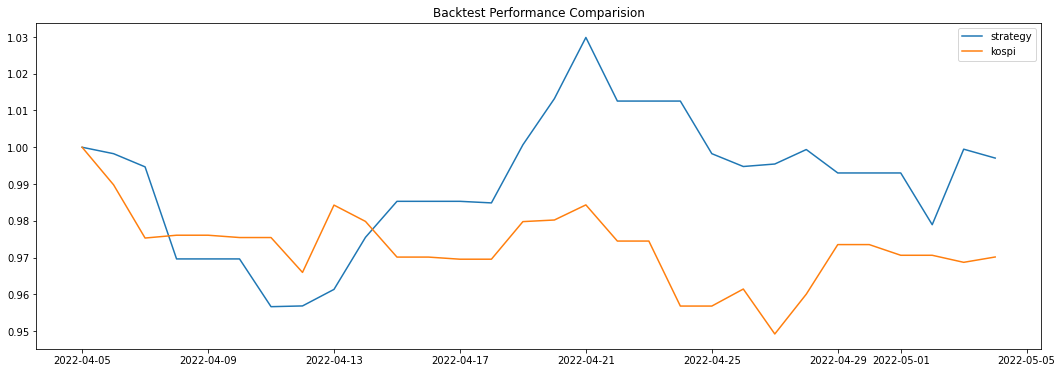

In [ ]:
fig=plt.figure(figsize=(18,6))
title="Backtest Performance Comparision"
plt.plot(portfolio.index,valuation)
plt.plot(KOSPI.index,KOSPI/KOSPI.iloc[0])
plt.legend(['strategy','kospi'])
plt.title(title)
plt.savefig("{}.png".format(title))
plt.show()